In [3]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats
import math

## Data Loading

In [33]:
raw_data = pd.read_csv("./data.csv")
raw_data

,user_name,raw_timestamp_part_1,raw_timestamp_part_2,cvtd_timestamp,new_window,num_window,class,gyros_belt_x,gyros_belt_y,gyros_belt_z,...,gyros_dumbbell_z,accel_dumbbell_x,accel_dumbbell_y,accel_dumbbell_z,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z
0,eurico,1322489729,34670,28/11/2011 14:15,no,1,E,2.02,0.18,0.02,...,0.08,5,21,37,-0.05,-0.37,-0.43,-170.0,155.0,184
1,eurico,1322489729,62641,28/11/2011 14:15,no,1,E,1.96,0.14,0.05,...,0.07,4,22,35,-0.06,-0.37,-0.59,-178.0,164.0,182
2,eurico,1322489729,70653,28/11/2011 14:15,no,1,E,1.88,0.08,0.05,...,0.05,3,23,37,-0.05,-0.27,-0.72,-182.0,172.0,185
3,eurico,1322489729,82654,28/11/2011 14:15,no,1,E,1.80,0.03,0.08,...,0.07,5,24,38,0.02,-0.24,-0.79,-185.0,182.0,188
4,eurico,1322489729,90637,28/11/2011 14:15,no,1,E,1.77,0.00,0.13,...,0.07,5,23,37,0.08,-0.27,-0.82,-188.0,195.0,188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39235,adelmo,1322832937,596287,2/12/11 13:35,no,844,E,0.39,-0.02,-0.67,...,0.05,-41,62,-164,1.59,-1.36,0.00,-271.0,-91.0,-43
39236,adelmo,1322832937,636283,2/12/11 13:35,no,844,E,0.37,0.00,-0.64,...,0.21,-38,54,-170,1.54,-1.20,0.05,-263.0,-99.0,-45
39237,adelmo,1322832937,672400,2/12/11 13:35,no,844,E,0.37,0.00,-0.61,...,0.33,-38,44,-177,1.53,-1.04,0.07,-263.0,-117.0,-49
39238,adelmo,1322832937,964299,2/12/11 13:35,no,844,E,0.37,-0.02,-0.59,...,0.34,-40,42,-176,1.48,-0.90,0.05,-270.0,-141.0,-51


In [34]:
data = pd.DataFrame(columns=["cls", "gyroX", "gyroY", "gyroZ", "accelX", "accelY", "accelZ", "timestamp"])

cls = ""
gyroX = []
gyroY = []
gyroZ = []
accelX = []
accelY = []
accelZ = []
timestamp = []

for i, row in raw_data.iterrows():
    if row['new_window'] == "yes":
        cls = row['class']
        gyroX.append(row['gyros_forearm_x'])
        gyroY.append(row['gyros_forearm_y'])
        gyroZ.append(row['gyros_forearm_z'])
        accelX.append(row['accel_forearm_x'])
        accelY.append(row['accel_forearm_y'])
        accelZ.append(row['accel_forearm_z'])
        timestamp.append(row['raw_timestamp_part_2'])
        data = data.append({
            "cls": str(cls),
            "gyroX": gyroX,
            "gyroY": gyroY,
            "gyroZ": gyroZ,
            "accelX": accelX,
            "accelY": accelY,
            "accelZ": accelZ,
            "timestamp": timestamp
        }, ignore_index=True)
        cls = ""
        gyroX = []
        gyroY = []
        gyroZ = []
        accelX = []
        accelY = []
        accelZ = []
        timestamp = []
    else:
        cls = row['class']
        gyroX.append(row['gyros_forearm_x'])
        gyroY.append(row['gyros_forearm_y'])
        gyroZ.append(row['gyros_forearm_z'])
        accelX.append(row['accel_forearm_x'])
        accelY.append(row['accel_forearm_y'])
        accelZ.append(row['accel_forearm_z'])
        timestamp.append(row['raw_timestamp_part_2'])
        
encoder = preprocessing.LabelEncoder()
data["cls"] = encoder.fit_transform(data["cls"])

data

,cls,gyroX,gyroY,gyroZ,accelX,accelY,accelZ,timestamp
0,4,"[-0.05, -0.06, -0.05, 0.02, 0.08, 0.14, 0.21, ...","[-0.37, -0.37, -0.27, -0.24, -0.27, -0.29, -0....","[-0.43, -0.59, -0.72, -0.79, -0.82, -0.82, -0....","[-170.0, -178.0, -182.0, -185.0, -188.0, -188....","[155.0, 164.0, 172.0, 182.0, 195.0, 207.0, 214...","[184, 182, 185, 188, 188, 190, 190, 190, 194, ...","[34670, 62641, 70653, 82654, 90637, 170626, 19..."
1,4,"[0.8, 0.66, 0.55, 0.61, 0.75, 0.85, 0.87, 0.79...","[-1.3, -0.43, 0.4, 0.35, -0.13, -0.48, -0.74, ...","[-0.98, -1.16, -1.3, -1.21, -0.89, -0.49, -0.2...","[-299.0, -259.0, -190.0, -143.0, -153.0, -158....","[240.0, 194.0, 160.0, 151.0, 149.0, 152.0, 153...","[207, 195, 203, 215, 216, 214, 209, 208, 205, ...","[10660, 10700, 46729, 78691, 78755, 90960, 110..."
2,4,"[-0.1, -0.08, -0.02, 0.03]","[0.06, -0.02, 0.02, 0.03]","[-0.02, -0.02, -0.03, -0.05]","[193.0, 197.0, 195.0, 192.0]","[167.0, 170.0, 171.0, 167.0]","[-163, -163, -162, -160]","[22756, 22794, 22811, 30638]"
3,4,"[1.35, 1.32, 1.22, 1.11, 1.04, 1.01, 0.95, 0.8...","[-0.37, -0.21, -0.1, 0.19, 0.66, 1.04, 1.25, 1...","[0.13, 0.21, 0.34, 0.44, 0.48, 0.44, 0.48, 0.5...","[-258.0, -259.0, -260.0, -267.0, -262.0, -254....","[-166.0, -175.0, -183.0, -185.0, -180.0, -173....","[-51, -51, -55, -63, -74, -75, -75, -79, -79, ...","[24324, 24368, 44390, 64324, 64372, 76294, 763..."
4,4,"[0.22, 0.34, 0.5, 0.59, 0.74, 0.96, 1.12, 1.19...","[2.79, 2.7, 2.14, 1.57, 1.24, 1.08, 0.96, 0.82...","[0.44, 0.74, 1.12, 1.46, 1.71, 1.79, 1.77, 1.7...","[83.0, 117.0, 114.0, 106.0, 92.0, 78.0, 60.0, ...","[380.0, 386.0, 392.0, 396.0, 401.0, 403.0, 399...","[-16, -10, 0, -1, -18, -23, -22, -26, -31, -34...","[20310, 56307, 76306, 76355, 124335, 136297, 1..."
...,...,...,...,...,...,...,...,...
839,1,"[0.21, 0.21, 0.19, 0.14, 0.06, 0.05, 0.11, 0.1...","[-1.67, -1.93, -2.17, -2.44, -2.59, -2.76, -2....","[-0.34, -0.44, -0.56, -0.69, -0.8, -0.85, -0.8...","[47.0, 37.0, 28.0, 19.0, 12.0, 16.0, 8.0, 0.0,...","[378.0, 395.0, 405.0, 405.0, 402.0, 399.0, 388...","[-208, -207, -208, -208, -205, -202, -195, -18...","[4406, 4438, 15151, 20280, 32320, 56344, 88290..."
840,1,"[0.21, 0.22, 0.37, 0.39, 0.24, -0.03, -0.31, -...","[2.04, 2.12, 2.07, 2.01, 2.07, 2.18, 2.02, 1.8...","[0.74, 0.71, 0.64, 0.62, 0.54, 0.38, 0.11, -0....","[-7.0, 28.0, 24.0, 13.0, 7.0, 12.0, 81.0, 82.0...","[342.0, 348.0, 343.0, 339.0, 341.0, 336.0, 351...","[-203, -208, -214, -223, -236, -246, -259, -25...","[36309, 84310, 132281, 244295, 256340, 256392,..."
841,0,"[0.08, 0.11, 0.11, 0.03, -0.03, -0.11, -0.22, ...","[2.14, 2.14, 2.02, 1.98, 1.88, 1.91, 1.86, 1.8...","[0.82, 0.74, 0.67, 0.64, 0.51, 0.33, 0.18, 0.0...","[61.0, 71.0, 62.0, 71.0, 76.0, 71.0, 79.0, 74....","[327.0, 334.0, 326.0, 326.0, 331.0, 324.0, 316...","[-204, -205, -206, -212, -226, -231, -235, -24...","[16422, 52271, 64341, 88277, 116292, 136387, 1..."
842,4,"[-0.22, -0.61, -0.8, -0.67, -0.39, -0.35, -0.4...","[4.35, 4.56, 4.77, 4.61, 4.16, 4.43, 5.01, 4.5...","[1.1, 1.12, 1.13, 1.28, 1.69, 2.15, 2.56, 2.79...","[-282.0, -237.0, -168.0, -107.0, -159.0, -167....","[265.0, 298.0, 318.0, 309.0, 292.0, 328.0, 392...","[22, 33, 48, 70, 64, 65, 61, 46, 18, -4, -3, 7...","[24395, 72317, 132275, 208297, 244312, 260302,..."


## EDA

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844 entries, 0 to 843
Data columns (total 8 columns):
cls          844 non-null int64
gyroX        844 non-null object
gyroY        844 non-null object
gyroZ        844 non-null object
accelX       844 non-null object
accelY       844 non-null object
accelZ       844 non-null object
timestamp    844 non-null object
dtypes: int64(1), object(7)
memory usage: 52.9+ KB


In [36]:
data["cls"].value_counts()

0    241
1    162
4    155
2    148
3    138
Name: cls, dtype: int64

## Classes Distribution

In [37]:
print(data.shape)
a = []

counter = 80

for i , row in data.iterrows():
    if row['cls'] == 0 and counter != 0:
        a.append(i)
        counter -= 1

a.reverse()

for index in a:
    data.drop(data.index[index], inplace=True)

print(data.shape)
print(data["cls"].value_counts())

(844, 8)
(764, 8)
1    162
0    161
4    155
2    148
3    138
Name: cls, dtype: int64


## Compare similar movements graphs

## Fitting movements into similar time slots

## Create Features

In [38]:
data_features = pd.DataFrame(columns=[
    "gyroX_mean", "gyroX_variance", "gyroX_skewness", "gyroX_kurtosis",
    "gyroY_mean", "gyroY_variance", "gyroY_skewness", "gyroY_kurtosis",
    "gyroZ_mean", "gyroZ_variance", "gyroZ_skewness", "gyroZ_kurtosis",
    "accelX_mean", "accelX_variance", "accelX_skewness", "accelX_kurtosis",
    "accelY_mean", "accelY_variance", "accelY_skewness", "accelY_kurtosis",
    "accelZ_mean", "accelZ_variance", "accelZ_skewness", "accelZ_kurtosis",
    "cls"
])


for i, row in data.iterrows():
    data_features = data_features.append({
        "gyroX_mean": np.mean(row["gyroX"]),
        "gyroX_variance": np.var(row["gyroX"]),
        "gyroX_skewness": scipy.stats.skew(row["gyroX"]),
        "gyroX_kurtosis": scipy.stats.kurtosis(row["gyroX"]),
        "gyroY_mean": np.mean(row["gyroY"]),
        "gyroY_variance": np.var(row["gyroY"]),
        "gyroY_skewness": scipy.stats.skew(row["gyroY"]),
        "gyroY_kurtosis": scipy.stats.kurtosis(row["gyroY"]),
        "gyroZ_mean": np.mean(row["gyroZ"]),
        "gyroZ_variance": np.var(row["gyroZ"]),
        "gyroZ_skewness": scipy.stats.skew(row["gyroZ"]),
        "gyroZ_kurtosis": scipy.stats.kurtosis(row["gyroZ"]),
        "accelX_mean": np.mean(row["accelX"]),
        "accelX_variance": np.var(row["accelX"]),
        "accelX_skewness": scipy.stats.skew(row["accelX"]),
        "accelX_kurtosis": scipy.stats.kurtosis(row["accelX"]),
        "accelY_mean": np.mean(row["accelY"]),
        "accelY_variance": np.var(row["accelY"]),
        "accelY_skewness": scipy.stats.skew(row["accelY"]),
        "accelY_kurtosis": scipy.stats.kurtosis(row["accelY"]),
        "accelZ_mean": np.mean(row["accelZ"]),
        "accelZ_variance": np.var(row["accelZ"]),
        "accelZ_skewness": scipy.stats.skew(row["accelZ"]),
        "accelZ_kurtosis": scipy.stats.kurtosis(row["accelZ"]),
        "cls": row["cls"]
        }, ignore_index=True)
    
data_features.head()

,gyroX_mean,gyroX_variance,gyroX_skewness,gyroX_kurtosis,gyroY_mean,gyroY_variance,gyroY_skewness,gyroY_kurtosis,gyroZ_mean,gyroZ_variance,...,accelX_kurtosis,accelY_mean,accelY_variance,accelY_skewness,accelY_kurtosis,accelZ_mean,accelZ_variance,accelZ_skewness,accelZ_kurtosis,cls
0,0.384894,0.123170,0.260293,-1.064493,-0.437234,0.132365,0.111366,0.417638,-0.428936,0.240265,...,-0.174370,209.553191,538.842915,0.231751,0.635437,210.829787,290.949751,0.077157,-1.195051,4.0
1,-0.024146,0.183346,0.976739,-0.465297,-0.434390,0.106434,0.178276,0.747509,-0.043415,0.233003,...,2.136553,153.048780,395.900059,2.209996,6.744097,213.804878,65.132659,-1.232408,1.108505,4.0
2,-0.042500,0.002619,0.279128,-1.512899,0.022500,0.000819,-0.252107,-1.044578,-0.030000,0.000150,...,-1.426602,168.750000,3.187500,0.115317,-1.847751,-162.000000,1.500000,0.816497,-1.000000,4.0
3,0.420000,0.148033,0.303120,-0.025002,2.923000,1.259314,-1.432634,1.504902,1.155000,0.263888,...,-0.778522,197.100000,56634.590000,-0.308753,-1.433558,-11.000000,2280.133333,0.157082,-1.419777,4.0
4,1.173810,0.076352,-2.190518,3.908753,-0.882619,3.478005,0.170553,-1.232110,0.431905,0.501706,...,0.265896,468.904762,3224.133787,-0.083968,-1.530327,-23.714286,66.775510,0.830490,1.058070,4.0


## Normalize Data

In [39]:
min_max_scaler = preprocessing.MinMaxScaler()
data_features_norm = pd.DataFrame(min_max_scaler.fit_transform(data_features.drop("cls", axis=1).values))
data_features_norm['cls'] = data_features[['cls']]
data_features_norm.columns = [
    "gyroX_mean", "gyroX_variance", "gyroX_skewness", "gyroX_kurtosis",
    "gyroY_mean", "gyroY_variance", "gyroY_skewness", "gyroY_kurtosis",
    "gyroZ_mean", "gyroZ_variance", "gyroZ_skewness", "gyroZ_kurtosis",
    "accelX_mean", "accelX_variance", "accelX_skewness", "accelX_kurtosis",
    "accelY_mean", "accelY_variance", "accelY_skewness", "accelY_kurtosis",
    "accelZ_mean", "accelZ_variance", "accelZ_skewness", "accelZ_kurtosis",
    "cls"
]
data_features_norm

,gyroX_mean,gyroX_variance,gyroX_skewness,gyroX_kurtosis,gyroY_mean,gyroY_variance,gyroY_skewness,gyroY_kurtosis,gyroZ_mean,gyroZ_variance,...,accelX_kurtosis,accelY_mean,accelY_variance,accelY_skewness,accelY_kurtosis,accelZ_mean,accelZ_variance,accelZ_skewness,accelZ_kurtosis,cls
0,0.880241,4.274439e-05,0.783452,0.013430,0.216648,1.971418e-05,0.310157,0.044306,0.229605,2.573541e-04,...,0.042865,0.674136,0.005334,0.247763,0.050693,0.963354,0.035177,0.751740,0.011633,4.0
1,0.838097,6.363556e-05,0.859866,0.025200,0.216842,1.584995e-05,0.316595,0.050537,0.290965,2.495750e-04,...,0.107057,0.604954,0.003916,0.471731,0.175399,0.969599,0.007812,0.593487,0.066523,4.0
2,0.836206,8.933868e-07,0.785461,0.004623,0.248020,1.106887e-07,0.275186,0.016689,0.293100,1.368789e-07,...,0.008081,0.624178,0.000022,0.234581,0.000000,0.180803,0.000101,0.841085,0.016281,4.0
3,0.883859,5.137618e-05,0.788020,0.033848,0.445952,1.876567e-04,0.161602,0.064842,0.481705,2.826602e-04,...,0.026083,0.658889,0.561667,0.186570,0.008456,0.497745,0.276230,0.761398,0.006278,4.0
4,0.961525,2.649101e-05,0.522054,0.111115,0.186254,5.182947e-04,0.315852,0.013147,0.366617,5.374165e-04,...,0.055095,0.991680,0.031966,0.212019,0.006480,0.471058,0.008011,0.842776,0.065321,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,0.837673,2.636620e-05,0.773474,0.018876,0.046036,2.909498e-04,0.407358,0.045976,0.182207,1.554719e-04,...,0.008520,0.515301,0.689575,0.211506,0.005557,0.091598,0.011841,0.759530,0.026188,1.0
760,0.837767,1.008004e-05,0.838164,0.032918,0.282610,1.021464e-04,0.395077,0.023534,0.305606,8.623829e-05,...,0.083475,0.760515,0.013477,0.300903,0.016255,0.032806,0.013814,0.794448,0.054653,1.0
761,0.849292,5.553373e-05,0.666715,0.043093,0.159030,7.126892e-04,0.348808,0.009658,0.253622,3.827400e-04,...,0.032915,0.763823,0.093948,0.115176,0.037616,0.100632,0.045008,0.688289,0.027191,0.0
762,0.880650,1.317179e-04,0.744793,0.015937,0.455008,2.712363e-04,0.269269,0.011821,0.558671,2.737885e-04,...,0.066315,0.934426,0.045571,0.155263,0.029439,0.517655,0.152341,0.780796,0.032204,4.0


## Correlations

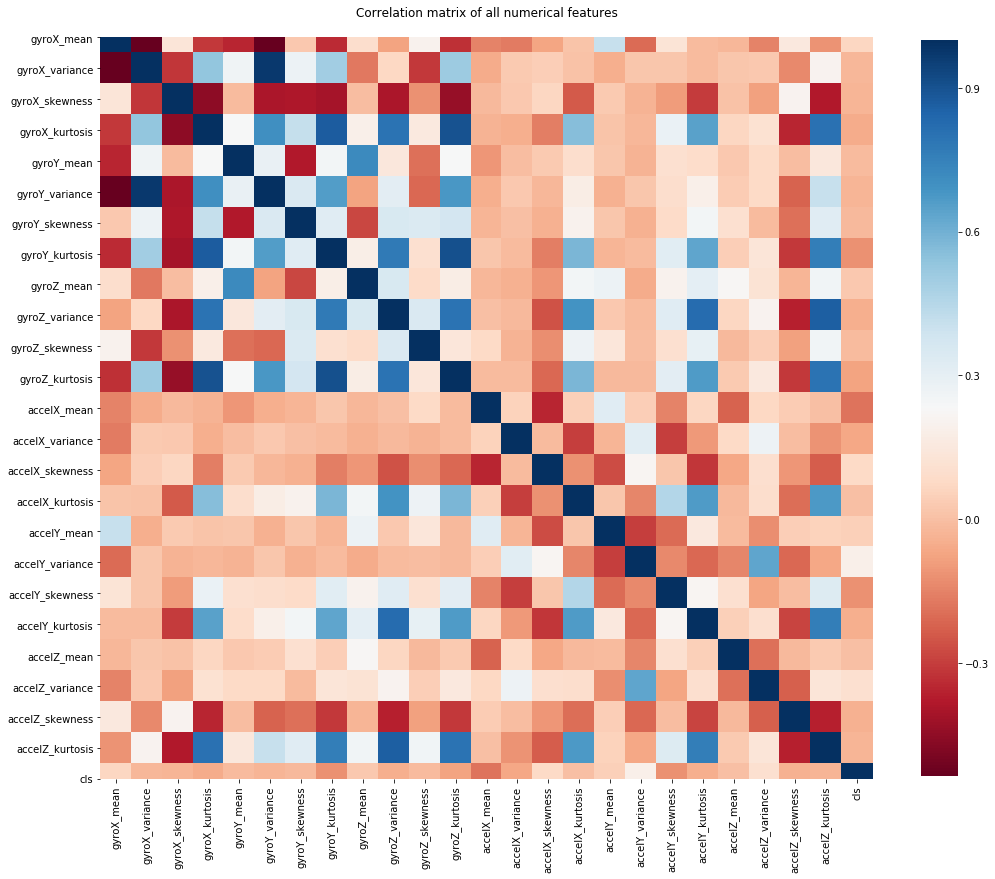

In [40]:
def show_corrilations(df):
    corr = df.select_dtypes(include="number").corr()
    plt.subplots(figsize=(15,15));
    sns.heatmap(corr, cmap="RdBu", square=True, cbar_kws={"shrink": .7})
    plt.title("Correlation matrix of all numerical features\n")
    plt.tight_layout()
    plt.show()
    
show_corrilations(data_features_norm)

## Train, Test split

In [41]:
X = data_features_norm[["gyroX_mean", "gyroX_variance", "gyroX_skewness", "gyroX_kurtosis",
    "gyroY_mean", "gyroY_variance", "gyroY_skewness", "gyroY_kurtosis",
    "gyroZ_mean", "gyroZ_variance", "gyroZ_skewness", "gyroZ_kurtosis",
    "accelX_mean", "accelX_variance", "accelX_skewness", "accelX_kurtosis",
    "accelY_mean", "accelY_variance", "accelY_skewness", "accelY_kurtosis",
    "accelZ_mean", "accelZ_variance", "accelZ_skewness", "accelZ_kurtosis"]]
y = data_features_norm["cls"]

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [43]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [44]:
predicted = model.predict(X_test)

In [45]:
predicted

array([4., 2., 2., 2., 0., 0., 1., 1., 2., 0., 3., 3., 2., 0., 3., 2., 0.,
       1., 0., 1., 0., 3., 0., 2., 2., 0., 3., 4., 0., 2., 1., 3., 3., 2.,
       2., 1., 4., 2., 1., 1., 3., 4., 2., 1., 1., 1., 2., 0., 2., 0., 2.,
       1., 1., 0., 4., 0., 1., 1., 2., 3., 4., 2., 1., 0., 0., 0., 1., 1.,
       3., 2., 3., 4., 3., 4., 1., 1., 0.])

In [46]:
np.array(y_test)

array([1., 1., 2., 3., 0., 0., 1., 4., 2., 0., 4., 3., 1., 0., 3., 2., 0.,
       1., 0., 4., 1., 3., 2., 3., 2., 0., 3., 4., 1., 2., 4., 3., 2., 2.,
       1., 1., 4., 4., 4., 4., 3., 3., 2., 0., 0., 1., 1., 1., 1., 0., 2.,
       0., 2., 4., 4., 0., 1., 4., 3., 3., 4., 3., 1., 0., 0., 1., 1., 4.,
       3., 2., 3., 1., 3., 3., 1., 1., 1.])

In [47]:
metrics.accuracy_score(y_test, predicted)

0.5584415584415584

# Self-Made Dataset

In [4]:
df1 = pd.read_csv("./df_1.csv")
df2 = pd.read_csv("./df_2.csv")
labels1 = pd.read_csv("./labels_1.csv")
labels2 = pd.read_csv("./labels_2.csv")

In [5]:
df1.head()

,Unnamed: 0,tm,ax,ay,az,gx,gy,gz
0,0,9245,9.409692,-2.399112,0.445344,0.029209,0.029209,0.029209
1,1,9327,9.601238,-2.408690,0.627313,-0.391843,-0.391843,-0.391843
2,2,9409,9.275610,-2.140525,1.034348,-0.360551,-0.360551,-0.360551
3,3,9491,9.711377,-1.379130,1.599408,-0.317407,-0.317407,-0.317407
4,4,9574,9.342651,-1.350399,2.169257,-0.435786,-0.435786,-0.435786


In [6]:
labels1.head()

,Unnamed: 0,start,end,move
0,0,188973,190533,lunge
1,1,196611,198171,lunge
2,2,203674,205234,lunge
3,3,210737,212296,lunge
4,4,218045,219606,lunge


In [7]:
data = pd.DataFrame(columns=['accelX', 'accelY', 'accelZ', 'gyroX', 'gyroY', 'gyroZ', 'timestamp', 'cls']) 

indx = 0

start = 0
end = 0

for i, row in df1.iterrows():
    try:
        if int(row['tm']) == labels1[indx:indx+1]['start'].item():
            start = i
        if int(row['tm']) == labels1[indx:indx+1]['end'].item():
            end = i+1
            data = data.append({
                'accelX': list(df1['ax'][start:end]),
                'accelY': list(df1['ay'][start:end]),
                'accelZ': list(df1['az'][start:end]),
                'gyroX': list(df1['gx'][start:end]),
                'gyroY': list(df1['gy'][start:end]),
                'gyroZ': list(df1['gz'][start:end]),
                'timestamp': list(df1['tm'][start:end]),
                'cls': labels1[indx:indx+1]['move'].item()
            }, ignore_index=True)
            indx += 1
    except:
        continue

indx = 0

start = 0
end = 0

for i, row in df2.iterrows():
    try:
        if int(row['tm']) == labels2[indx:indx+1]['start'].item():
            start = i
        if int(row['tm']) == labels2[indx:indx+1]['end'].item():
            end = i+1
            data = data.append({
                'accelX': list(df2['ax'][start:end]),
                'accelY': list(df2['ay'][start:end]),
                'accelZ': list(df2['az'][start:end]),
                'gyroX': list(df2['gx'][start:end]),
                'gyroY': list(df2['gy'][start:end]),
                'gyroZ': list(df2['gz'][start:end]),
                'timestamp': list(df2['tm'][start:end]),
                'cls': labels2[indx:indx+1]['move'].item()
            }, ignore_index=True)
            indx += 1
    except:
        continue

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: `item` has been deprecated and will be removed in a future version
  # Remove the CWD from sys.path while we load stuff.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: `item` has been deprecated and will be removed in a future version
  if sys.path[0] == '':
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: `item` has been deprecated and will be removed in a future version
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: FutureWarning: `item` has been deprecated and will be removed in a future version
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: FutureWarning: `item` has been deprecated and will be removed in a future version
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: FutureWarning: `item` has been deprecated and will be removed in a future version


In [8]:
data

,accelX,accelY,accelZ,gyroX,gyroY,gyroZ,timestamp,cls
0,"[-7.824649810791016, 2.245875597000122, 23.440...","[-1.9537681341171265, 4.812590599060059, -10.3...","[4.367246627807616, -2.9162862300872803, -4.36...","[-2.8121612071990967, 1.7220727205276491, 4.39...","[-2.8121612071990967, 1.7220727205276491, 4.39...","[-2.8121612071990967, 1.7220727205276491, 4.39...","[188973, 189054, 189136, 189219, 189301, 18938...",lunge
1,"[6.785513401031494, -4.683297157287598, 0.4453...","[-16.18562889099121, -1.814897418022156, 4.276...","[-3.9219021797180176, -6.124680042266848, -1.8...","[-0.4380500614643097, -0.01726421341300011, 0....","[-0.4380500614643097, -0.01726421341300011, 0....","[-0.4380500614643097, -0.01726421341300011, 0....","[196611, 196692, 196775, 196857, 196939, 19702...",lunge
2,"[-9.05533218383789, 8.159854888916017, 26.7924...","[-2.1836233139038086, 3.5771195888519287, -26....","[1.6185628175735474, -2.9067089557647705, 7.48...","[-0.2971667051315308, -0.14150255918502808, 3....","[-0.2971667051315308, -0.14150255918502808, 3....","[-0.2971667051315308, -0.14150255918502808, 3....","[203674, 203756, 203838, 203920, 204002, 20408...",lunge
3,"[-1.7382789850234983, -6.943538665771484, 8.59...","[-4.0559844970703125, -1.7430676221847534, 0.3...","[-5.51652193069458, -4.0990819931030265, -9.03...","[-0.1434999704360962, -0.9837400317192078, 0.6...","[-0.1434999704360962, -0.9837400317192078, 0.6...","[-0.1434999704360962, -0.9837400317192078, 0.6...","[210737, 210819, 210900, 210982, 211064, 21114...",lunge
4,"[-8.241262435913086, 10.712203979492188, 30.74...","[-2.4853079319000244, 3.816551923751831, -4.33...","[-1.891515731811524, 2.8300905227661133, -7.56...","[-1.2426033020019531, 0.0193548072129488, 3.19...","[-1.2426033020019531, 0.0193548072129488, 3.19...","[-1.2426033020019531, 0.0193548072129488, 3.19...","[218045, 218127, 218209, 218292, 218374, 21845...",lunge
5,"[-2.9976933002471924, 4.036829948425293, 18.45...","[-3.198816537857056, 4.242741584777832, -11.99...","[1.7717995643615725, -7.37451696395874, 5.4925...","[-1.7301024198532104, -1.0617719888687134, 3.4...","[-1.7301024198532104, -1.0617719888687134, 3.4...","[-1.7301024198532104, -1.0617719888687134, 3.4...","[223302, 223384, 223466, 223548, 223630, 22371...",lunge
6,"[-13.298073768615724, 18.91036796569824, 21.80...","[0.7709722518920898, 11.856691360473633, -11.4...","[2.78699278831482, -13.906231880187988, 2.3655...","[-0.1791868805885315, 3.1287758350372314, 3.44...","[-0.1791868805885315, 3.1287758350372314, 3.44...","[-0.1791868805885315, 3.1287758350372314, 3.44...","[228066, 228148, 228231, 228313, 228395, 22847...",lunge
7,"[0.7278743982315063, -0.9912500381469728, 4.06...","[-2.2362983226776123, -1.8579951524734497, -2....","[-2.29376220703125, -6.196509838104247, -5.846...","[-0.8794757127761841, -2.453960657119751, 1.22...","[-0.8794757127761841, -2.453960657119751, 1.22...","[-0.8794757127761841, -2.453960657119751, 1.22...","[238004, 238086, 238169, 238251, 238332, 23841...",lunge
8,"[-0.8523792624473572, 7.317053318023682, 1.029...","[0.8954770565032959, -11.18149185180664, 1.776...","[-0.12929348647594452, 0.5937922596931458, 1.9...","[-4.3317837715148935, -1.800011396408081, 2.77...","[-4.3317837715148935, -1.800011396408081, 2.77...","[-4.3317837715148935, -1.800011396408081, 2.77...","[243260, 243342, 243424, 243506, 243589, 24367...",lunge
9,"[10.204607963562012, 7.944365978240968, -3.294...","[-4.841322422027588, -8.313092231750487, -5.09...","[-2.9785387516021733, -4.3576693534851065, -2....","[0.21217060089111328, -1.248196005821228, -0.5...","[0.21217060089111328, -1.248196005821228, -0.5...","[0.21217060089111328, -1.248196005821228, -0.5...","[247037, 247119, 247201, 247284, 247366, 24744...",lunge


In [9]:
data["cls"].value_counts()

lunge     37
fleche    13
Name: cls, dtype: int64

In [22]:
data_features = pd.DataFrame(columns=[
    "gyroX_mean", "gyroX_variance", "gyroX_skewness", "gyroX_kurtosis",
    "gyroY_mean", "gyroY_variance", "gyroY_skewness", "gyroY_kurtosis",
    "gyroZ_mean", "gyroZ_variance", "gyroZ_skewness", "gyroZ_kurtosis",
    "accelX_mean", "accelX_variance", "accelX_skewness", "accelX_kurtosis",
    "accelY_mean", "accelY_variance", "accelY_skewness", "accelY_kurtosis",
    "accelZ_mean", "accelZ_variance", "accelZ_skewness", "accelZ_kurtosis",
    "cls"
])


for i, row in data.iterrows():
    data_features = data_features.append({
        "gyroX_mean": np.mean(row["gyroX"]),
        "gyroX_variance": np.var(row["gyroX"]),
        "gyroX_skewness": scipy.stats.skew(row["gyroX"]),
        "gyroX_kurtosis": scipy.stats.kurtosis(row["gyroX"]),
        "gyroY_mean": np.mean(row["gyroY"]),
        "gyroY_variance": np.var(row["gyroY"]),
        "gyroY_skewness": scipy.stats.skew(row["gyroY"]),
        "gyroY_kurtosis": scipy.stats.kurtosis(row["gyroY"]),
        "gyroZ_mean": np.mean(row["gyroZ"]),
        "gyroZ_variance": np.var(row["gyroZ"]),
        "gyroZ_skewness": scipy.stats.skew(row["gyroZ"]),
        "gyroZ_kurtosis": scipy.stats.kurtosis(row["gyroZ"]),
        "accelX_mean": np.mean(row["accelX"]),
        "accelX_variance": np.var(row["accelX"]),
        "accelX_skewness": scipy.stats.skew(row["accelX"]),
        "accelX_kurtosis": scipy.stats.kurtosis(row["accelX"]),
        "accelY_mean": np.mean(row["accelY"]),
        "accelY_variance": np.var(row["accelY"]),
        "accelY_skewness": scipy.stats.skew(row["accelY"]),
        "accelY_kurtosis": scipy.stats.kurtosis(row["accelY"]),
        "accelZ_mean": np.mean(row["accelZ"]),
        "accelZ_variance": np.var(row["accelZ"]),
        "accelZ_skewness": scipy.stats.skew(row["accelZ"]),
        "accelZ_kurtosis": scipy.stats.kurtosis(row["accelZ"]),
        "cls": row["cls"]
        }, ignore_index=True)
    
data_features.head()

,gyroX_mean,gyroX_variance,gyroX_skewness,gyroX_kurtosis,gyroY_mean,gyroY_variance,gyroY_skewness,gyroY_kurtosis,gyroZ_mean,gyroZ_variance,...,accelX_kurtosis,accelY_mean,accelY_variance,accelY_skewness,accelY_kurtosis,accelZ_mean,accelZ_variance,accelZ_skewness,accelZ_kurtosis,cls
0,-0.316954,2.783148,0.621992,1.454063,-0.316954,2.783148,0.621992,1.454063,-0.316954,2.783148,...,0.424415,-3.448544,19.843762,-0.748875,0.611091,-7.000763,54.139042,-0.747517,0.450011,lunge
1,-0.253470,1.068851,0.018734,0.599575,-0.253470,1.068851,0.018734,0.599575,-0.253470,1.068851,...,-0.185047,-2.132624,22.390668,-1.365529,2.115448,-6.583911,21.409583,-0.456576,-1.184298,lunge
2,-0.066127,2.575832,1.014856,1.720463,-0.066127,2.575832,1.014856,1.720463,-0.066127,2.575832,...,2.424164,-4.599975,41.307202,-1.846460,3.717706,-3.283097,93.420776,0.474875,0.016788,lunge
3,-0.269742,1.495864,-2.174847,4.265953,-0.269742,1.495864,-2.174847,4.265953,-0.269742,1.495864,...,1.042245,-3.438249,50.941964,-1.914848,3.903396,-7.685061,42.803363,-0.225883,-0.775014,lunge
4,0.535310,2.685598,1.131254,0.491540,0.535310,2.685598,1.131254,0.491540,0.535310,2.685598,...,1.032573,-1.596056,33.565797,1.427965,2.651146,-6.705543,75.922374,0.143401,-0.653083,lunge


In [23]:
X = data_features[["gyroX_mean", "gyroX_variance", "gyroX_skewness", "gyroX_kurtosis",
    "gyroY_mean", "gyroY_variance", "gyroY_skewness", "gyroY_kurtosis",
    "gyroZ_mean", "gyroZ_variance", "gyroZ_skewness", "gyroZ_kurtosis",
    "accelX_mean", "accelX_variance", "accelX_skewness", "accelX_kurtosis",
    "accelY_mean", "accelY_variance", "accelY_skewness", "accelY_kurtosis",
    "accelZ_mean", "accelZ_variance", "accelZ_skewness", "accelZ_kurtosis"]]
y = data_features["cls"]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [26]:
predicted = model.predict(X_test)

In [27]:
y_test

13     lunge
39     lunge
30     lunge
45    fleche
17     lunge
48     lunge
26    fleche
25    fleche
32     lunge
19     lunge
Name: cls, dtype: object

In [28]:
predicted

array(['lunge', 'lunge', 'lunge', 'lunge', 'lunge', 'lunge', 'fleche',
       'fleche', 'lunge', 'lunge'], dtype=object)

In [29]:
metrics.accuracy_score(y_test, predicted)

0.9